---
# Crash Course Python for Data Science — Predictive Modelling
---
# 02 - Classification modelling
---

## Exercise

Run this cell to load the Titanic data:

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression       
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score 

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# time
import time

print('Libraries imported.')

Libraries imported.


Then, train a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba), [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), or [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model. Use any features and parameters you want. 

Try to get better than 78.0% accuracy on the test set! (This is not required, but encouraged.)

Do refer to the lecture notebook — but try not to copy-paste.

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

After this, you may want to try [Kaggle's Titanic challenge](https://www.kaggle.com/c/titanic)!

Again, I've written an example solution covereing everything, from exploratory data analysis (cleaning data and all that) to model evaluation for you to see the whole process. I strongly encourage you to come up with your own solution before looking at mine!

In [2]:
# Run this to split your data into train and test

train, test = train_test_split(sns.load_dataset('titanic').drop(columns=['alive']), random_state=0)
target = 'survived'

## 1. Exploratory Data Analysis


In [3]:
#@title Double click here for a sample solution
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 105 to 684
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     668 non-null    int64   
 1   pclass       668 non-null    int64   
 2   sex          668 non-null    object  
 3   age          535 non-null    float64 
 4   sibsp        668 non-null    int64   
 5   parch        668 non-null    int64   
 6   fare         668 non-null    float64 
 7   embarked     666 non-null    object  
 8   class        668 non-null    category
 9   who          668 non-null    object  
 10  adult_male   668 non-null    bool    
 11  deck         156 non-null    category
 12  embark_town  666 non-null    object  
 13  alone        668 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 60.5+ KB


#### Feature description

- `survived`:    Survival  
- `pclass`:    Ticket class     
- `sex`:    Sex     
- `age`:    Age in years     
- `sibsp`:    # of siblings / spouses aboard the Titanic     
- `parch`:    # of parents / children aboard the Titanic         
- `fare`:    Passenger fare     
- `deck`:    Deck    
- `embarked`: Port of Embarkation
- `embark_town`: Town of Embarkation
- `alone`: if person was travelling alone or not
- `who`: male or female
- `adult_male`: If person was male or not

In [4]:

train.describe()

,survived,pclass,age,sibsp,parch,fare
count,668.000000,668.000000,535.000000,668.000000,668.000000,668.000000
mean,0.386228,2.305389,29.900000,0.534431,0.392216,32.373621
std,0.487249,0.837377,14.487993,1.161739,0.822509,50.632021
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:

train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,False
253,0,3,male,30.0,1,0,16.1000,S,Third,man,True,NaN,Southampton,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,True
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,True


In [6]:

# Missing values 

total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
deck,512,76.6
age,133,19.9
embarked,2,0.3
embark_town,2,0.3
survived,0,0.0


In [7]:

train.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alone'], dtype=object)

### `age` vs `sex`

C:\Users\haich\AppData\Local\Temp\ipykernel_8784\4202924234.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
C:\Users\haich\AppData\Local\Temp\ipykernel_8784\4202924234.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

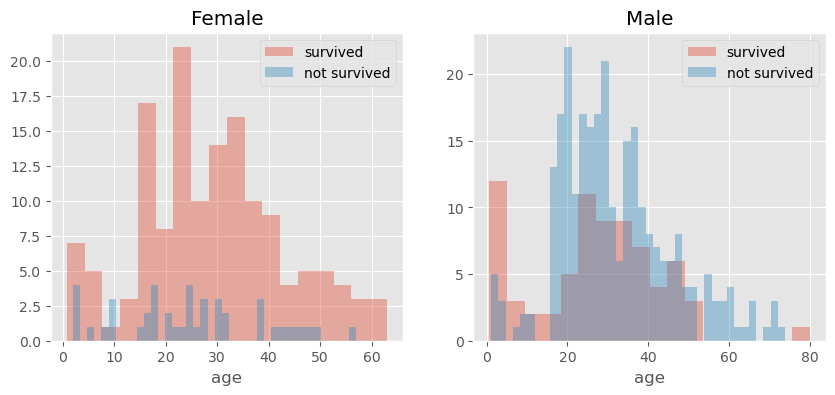

In [8]:

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['sex']=='female']
men = train[train['sex']=='male']

# Female survived/not survided
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

# Male survived/not survived
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Seems pretty clear that `sex` has to do with survival probability

### `embarked`, `pclass` and `sex`

In [9]:

FacetGrid = sns.FacetGrid(train, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

`embarked` seems correlated with survival depending on gender, as `pclass`

In [ ]:
sns.barplot(x='pclass', y='survived', data=train)

`pclass` appears to be contributing to survival

In [ ]:


grid = sns.FacetGrid(train, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

Assumption about `pclass` 1 contributing ti survival appears true. There seems to be a low probability of persons in `pclass` 3 not surviving.

In [ ]:

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
alone = train[train['alone']==True]
not_alone = train[train['alone']==False]

# Alone survived/not survided
ax = sns.distplot(alone[alone['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(alone[alone['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Alone')

# Not alone survived/not survived
ax = sns.distplot(not_alone[not_alone['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(not_alone[not_alone['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Not alone')

Seems like younger people travelling alone have a higher probability or survival, whereas travelling not alone is more relatively equally distributed between age groups.

## 2. Data cleaning

#### Drop `class`, `adult_male` and `who` as they are repetitive. Also dropping `sibsp` and `parch`, as `alone` already accounts for travelling alone or with family/friends. 

In [ ]:

train = train.drop(['class', 'adult_male', 'who', 'sibsp', 'parch'], axis=1)
test = test.drop(['class', 'adult_male', 'who', 'sibsp', 'parch'], axis=1)

### Missing values `deck`

In [ ]:

train['deck'].describe()  

In [ ]:
# 512 missing values, we'll just replace with 0
print('deck has', train['deck'].isna().sum(), 'missing values')

In [ ]:

deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H':0}
data = [train, test]

# fill NaN values with H first, then fill values with numerical data
for dataset in data:
  dataset['deck'] = dataset['deck'].cat.add_categories('H').fillna('H')
  dataset['deck'] = dataset['deck'].map(deck)

In [ ]:

print('train `deck` has', train['deck'].isna().sum(), 'missing values')
print('test `deck` has', test['deck'].isna().sum(), 'missing values')

### Missing values `age`

In [ ]:

print('age has', train['age'].isna().sum(), 'missing values')

In [ ]:

data = [train, test]

for dataset in data:
    mean = train["age"].mean()
    std = test["age"].std()
    is_null = dataset["age"].isnull().sum()

    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # fill NaN values in age column with random values generated
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = dataset["age"].astype(int)

In [ ]:

print('train `age` has', train['age'].isna().sum(), 'missing values')
print('test `age` has', test['age'].isna().sum(), 'missing values')

### Missing values `embarked` and `embark_town`

In [ ]:

print('train `embarked` has', train['embarked'].isnull().sum(), 'missing values')
print('test `embarked` has', test['embarked'].isnull().sum(), 'missing values')
print('train `embarked_town` has', train['embark_town'].isnull().sum(), 'missing values')
print('test `embarked_town` has', test['embark_town'].isnull().sum(), 'missing values')

In [ ]:
# Just 2 missings in train set so will fill in with mode
train['embarked'].describe()

In [ ]:
train['embark_town'].describe()

In [ ]:
common_value = 'S'
common_town = 'Southampton'
data = [train]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)
    dataset['embark_town'] = dataset['embark_town'].fillna(common_town)

In [ ]:

# double check
print('train `embarked` has', train['embarked'].isnull().sum(), 'missing values')
print('test `embarked` has', test['embarked'].isnull().sum(), 'missing values')
print('train `embarked_town` has', train['embark_town'].isnull().sum(), 'missing values')
print('test `embarked_town` has', test['embark_town'].isnull().sum(), 'missing values')

## 3. Preparing data for modelling

In [ ]:
train.info()

#### `fare` from `float64` to `int64`

In [ ]:

data = [train, test]

for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

#### `sex` to numeric


In [ ]:

sex = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['sex'] = dataset['sex'].map(sex)

#### `embarked` to numeric

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

### `alone` from boolean to numeric

In [ ]:

data = [train, test]
for dataset in data:
    dataset['alone'] = dataset['alone'].astype(int)

In [ ]:

train.info()

In [ ]:
train.head(5)

### Getting dummies for categorical `deck` and `embark_town`

In [ ]:

train = pd.get_dummies(train)
train.head(5)

In [ ]:

test = pd.get_dummies(test)
test.head(5)

### Multicollinearity

In [ ]:

def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. 
    A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

In [ ]:
multi_collinearity_heatmap(train, figsize=(10,10))

Areas of multi-collinearity::

`embark_town_Queenston` and `embarked_Cherbourg` show a strong positive correlation with `embarked`, whistle `embark_town_Southampton` is strongly negatively correlated with `embarked`. This suggests that including `embark_town` only as a feature should be enough to control for the influence of place of embarkment.

`deck_0` which is our `NaN` values, and `pclass` are perfectly positively correlated and negatively correlated with `fare`. This could mean different things. Perhaps is because deck numbers are correlated with ticket class and people without a ticket were all from certain class. Thus, dropping `deck_0` should be ok, as it is being taken into account by `pclass`. 

As expected, `sex` and `survived` also show strong positive correlation. 

Unsurprisingly, `fare` and `pclass` are strongly negatively correlated, so one will be dropped.

In [ ]:

to_drop = ['embarked', 'fare', 'deck_0']
data = [train, test]

for dataset in data:
  to_drop.extend(list(dataset.columns[dataset.columns.str.endswith('nan')]))
  dataset.drop(to_drop, axis=1, inplace=True)

In [ ]:

# Final assessment multicollinearity
multi_collinearity_heatmap(train, figsize=(10,10))

### Feature scaling

Finally, predictive features `X` and the target feature `y` can be separated, and `X` will be scaled with `StandardScaler` from `sklearn`.

In [ ]:

# Separating X and y
X_train  = train.drop(target, axis=1)
Y_train = train[target]

X_test = test.drop(target, axis=1)
Y_test = test[target]

# Scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=list(X_test.columns))

## 4. Building a Machine Learning Model

### Random Forest

In [ ]:

rf_start = time.time()

# Create instance of the model
rf = RandomForestClassifier(n_estimators=100)

# training the algorithm
rf.fit(X_train, Y_train)

# making predictions
Y_pred = rf.predict(X_test)

rf_end = time.time()

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")

# Check the predictions against the actual values:

print('Confusion matrix:', confusion_matrix(Y_test, Y_pred))
print('Classification report:', classification_report(Y_test, Y_pred))
print('Acuracy:', accuracy_score(Y_test, Y_pred))

In [ ]:

# Feature importance
rf_importance = pd.DataFrame(rf.feature_importances_, columns=['importance'], index = X_train.columns)

# Plotting feature importances
plt.figure(figsize=(5,5))
plt.barh(rf_importance.index, rf_importance.importance, align='center') 
plt.title("Feature importances in the Random Forest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()


## 5. Conclusion


As expected, `sex` and `age` are the main features by far, with a model accuracy of 79.37%, which could be improved by doing some hyper-parameter tunning.
